In [1]:
from matplotlib import pyplot
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

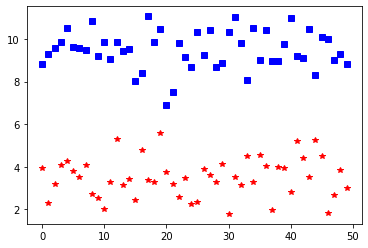

In [10]:
# Generate linear separable patterns
features, labels = make_blobs(
    n_samples=100, centers=2, n_features=1, center_box=(0, 10), random_state=42
)
x_train, x_test, y_train, y_test = train_test_split(
    features, labels, random_state=42, test_size=0.2
)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Plot entire dataset
pyplot.plot(features[:, 0][labels == 0], "r*")
pyplot.plot(features[:, 0][labels == 1], "bs")
pyplot.show()

In [3]:
import numpy as np

In [11]:
def sign(x):
    if x >= 0:
        return 1
    else:
        return -1


def perceptron(x, weights):
    return weights.T @ x

In [12]:
# Train data preprocess
redundancy_train = np.array([-1] * x_train.shape[0], dtype=np.float32).reshape(-1, 1)
x_train_with_bias = np.concatenate([redundancy_train, x_train], axis=1)[:, :, None]
y_train_signed = np.where(y_train == 0, -1, 1)
# Test data preprocess
redundancy_test = np.array([-1] * x_test.shape[0], dtype=np.float32).reshape(-1, 1)
x_test_with_bias = np.concatenate([redundancy_test, x_test], axis=1)[:, :, None]
y_test_signed = np.where(y_test == 0, -1, 1)

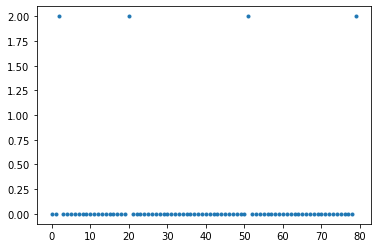

In [49]:
# Initial weights
weights = np.zeros(x_train_with_bias.shape[1], dtype=np.float32)[:, None]
# Set threshold
weights[0] = 1
# Loss curve
errors = []
for x, y in zip(x_train_with_bias, y_train_signed):
    r = sign(perceptron(x, weights))
    e = y - r 
    weights[1:] = weights[1:] + e * x[1:]
    errors.append(e)
pyplot.plot(errors, linewidth=0, marker=".")
pyplot.show()
predictions = []
for x, y in zip(x_test_with_bias, y_test_signed):
    r = sign(perceptron(x, weights))
    predictions.append(r)
predictions = np.array(predictions)

In [46]:
from sklearn.metrics import f1_score, accuracy_score

In [47]:
print("f1:", f1_score(predictions, y_test_signed))
print("accuracy:", accuracy_score(predictions, y_test_signed))

f1: 1.0
accuracy: 1.0


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [34]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg.score(x_test, y_test)

/nix/store/82xgbrx7jh6h4mf47jhfw3lswyvfrs4w-python3.7-scikit-learn-0.21.3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

In [79]:
svm = LinearSVC()
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.996